In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [2]:
spotifyData = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotifyData.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
spotifyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
#drop NaN values
key_dropped = spotifyData.dropna(subset=['key'])
key_dropped.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        41
bpm                      0
key                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [5]:
#Assume that the NaN values mean that the song is not in shazam charts
clean_df = key_dropped.copy()
clean_df['in_shazam_charts'] = pd.DataFrame(key_dropped['in_shazam_charts'].fillna(0))
clean_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            858 non-null    object
 1   artist(s)_name        858 non-null    object
 2   artist_count          858 non-null    int64 
 3   released_year         858 non-null    int64 
 4   released_month        858 non-null    int64 
 5   released_day          858 non-null    int64 
 6   in_spotify_playlists  858 non-null    int64 
 7   in_spotify_charts     858 non-null    int64 
 8   streams               858 non-null    object
 9   in_apple_playlists    858 non-null    int64 
 10  in_apple_charts       858 non-null    int64 
 11  in_deezer_playlists   858 non-null    object
 12  in_deezer_charts      858 non-null    int64 
 13  in_shazam_charts      858 non-null    object
 14  bpm                   858 non-null    int64 
 15  key                   858 non-null    object


# Creating a separate feature for artists

In [7]:
#separate the artist names using str.split()
artist_df = clean_df["artist(s)_name"].str.split(',', expand=True)
artist_df

,0,1,2,3,4,5,6,7
0,Latto,Jung Kook,None,None,None,None,None,None
1,Myke Towers,None,None,None,None,None,None,None
2,Olivia Rodrigo,None,None,None,None,None,None,None
3,Taylor Swift,None,None,None,None,None,None,None
4,Bad Bunny,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
948,Selena Gomez,None,None,None,None,None,None,None
949,Taylor Swift,None,None,None,None,None,None,None
950,Feid,Paulo Londra,None,None,None,None,None,None
951,Feid,Sech,Jhayco,None,None,None,None,None


In [8]:
#Add new columns for first, second and third artists
clean_df["artist_1"] = artist_df[0]
clean_df["artist_2"] = artist_df[1]
clean_df["artist_3"] = artist_df[2]

#removing artist(s)_name column
clean_df = clean_df.drop("artist(s)_name", axis=1)

#move newly created columns to the front
clean_df.insert(1, 'artist_1', clean_df.pop('artist_1'))
clean_df.insert(2, 'artist_2', clean_df.pop('artist_2'))
clean_df.insert(3, 'artist_3', clean_df.pop('artist_3'))
clean_df

,track_name,artist_1,artist_2,artist_3,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,Jung Kook,None,2,2023,7,14,553,147,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,None,None,1,2023,3,23,1474,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,None,None,1,2023,6,30,1397,113,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,None,None,1,2019,8,23,7858,100,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,None,None,1,2023,5,18,3133,50,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,None,None,1,2022,11,3,953,0,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,None,None,1,2022,10,21,1180,0,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),Feid,Paulo Londra,None,2,2022,11,3,573,0,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,Feid,Sech,Jhayco,3,2022,10,20,1320,0,...,97,C#,Major,82,67,77,8,0,12,5


In [9]:
clean_df.isnull().sum()

track_name                0
artist_1                  0
artist_2                527
artist_3                758
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts         0
streams                   0
in_apple_playlists        0
in_apple_charts           0
in_deezer_playlists       0
in_deezer_charts          0
in_shazam_charts          0
bpm                       0
key                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%            0
instrumentalness_%        0
liveness_%                0
speechiness_%             0
dtype: int64

In [10]:
#replace all the NaN values in artist_1 and artist_2 with "empty"
cleaner_df = clean_df.copy()
cleaner_df['artist_2'] = pd.DataFrame(clean_df['artist_2'].fillna("empty"))

even_cleaner_df = cleaner_df.copy()
even_cleaner_df['artist_3'] = pd.DataFrame(cleaner_df['artist_3'].fillna("empty")) 
even_cleaner_df.isnull().sum()

track_name              0
artist_1                0
artist_2                0
artist_3                0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

# Dropping certain features 

In [11]:
dropped_df = even_cleaner_df.drop(['released_year', 'released_month', 'released_day', 'track_name', 'in_spotify_playlists',
                   'in_apple_playlists', 'in_deezer_playlists'
                  ], axis = 1)
dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   artist_1            858 non-null    object
 1   artist_2            858 non-null    object
 2   artist_3            858 non-null    object
 3   artist_count        858 non-null    int64 
 4   in_spotify_charts   858 non-null    int64 
 5   streams             858 non-null    object
 6   in_apple_charts     858 non-null    int64 
 7   in_deezer_charts    858 non-null    int64 
 8   in_shazam_charts    858 non-null    object
 9   bpm                 858 non-null    int64 
 10  key                 858 non-null    object
 11  mode                858 non-null    object
 12  danceability_%      858 non-null    int64 
 13  valence_%           858 non-null    int64 
 14  energy_%            858 non-null    int64 
 15  acousticness_%      858 non-null    int64 
 16  instrumentalness_%  858 non-nul

# Fixing Data type for streams and in_shazam_charts

In [12]:
dropped_df['streams'] = pd.to_numeric(dropped_df['streams'], errors='coerce')

dropped_df.isna().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               1
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [13]:
#one data in streams didn't convert properly so we do it manually

In [14]:
spotifyData.iloc[574]

track_name                            Love Grows (Where My Rosemary Goes)
artist(s)_name                                          Edison Lighthouse
artist_count                                                            1
released_year                                                        1970
released_month                                                          1
released_day                                                            1
in_spotify_playlists                                                 2877
in_spotify_charts                                                       0
streams                 BPM110KeyAModeMajorDanceability53Valence75Ener...
in_apple_playlists                                                     16
in_apple_charts                                                         0
in_deezer_playlists                                                    54
in_deezer_charts                                                        0
in_shazam_charts                      

In [15]:
#data is messed up so we will delete this row

In [16]:
df = dropped_df.dropna(subset=['streams'])
df.isnull().sum()

artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 952
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_1            857 non-null    object 
 1   artist_2            857 non-null    object 
 2   artist_3            857 non-null    object 
 3   artist_count        857 non-null    int64  
 4   in_spotify_charts   857 non-null    int64  
 5   streams             857 non-null    float64
 6   in_apple_charts     857 non-null    int64  
 7   in_deezer_charts    857 non-null    int64  
 8   in_shazam_charts    857 non-null    object 
 9   bpm                 857 non-null    int64  
 10  key                 857 non-null    object 
 11  mode                857 non-null    object 
 12  danceability_%      857 non-null    int64  
 13  valence_%           857 non-null    int64  
 14  energy_%            857 non-null    int64  
 15  acousticness_%      857 non-null    int64  
 16  instrumentaln

In [18]:
#removing commas in in_shazam_charts since they are recognised as strings instead

In [19]:
df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df.isnull().sum()

/var/folders/3g/jhh3yqx96nxc6dwmcx3hk3x80000gn/T/ipykernel_94625/2242003826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = df['in_shazam_charts'].str.replace(',', '')
/var/folders/3g/jhh3yqx96nxc6dwmcx3hk3x80000gn/T/ipykernel_94625/2242003826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')


artist_1               0
artist_2               0
artist_3               0
artist_count           0
in_spotify_charts      0
streams                0
in_apple_charts        0
in_deezer_charts       0
in_shazam_charts      41
bpm                    0
key                    0
mode                   0
danceability_%         0
valence_%              0
energy_%               0
acousticness_%         0
instrumentalness_%     0
liveness_%             0
speechiness_%          0
dtype: int64

In [20]:
#some data in in_shazam_charts is empty. so we assume that those songs do not appear in the shazam charts

In [21]:
df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0)) 
df.isnull().sum()

/var/folders/3g/jhh3yqx96nxc6dwmcx3hk3x80000gn/T/ipykernel_94625/1676298079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_shazam_charts'] = pd.DataFrame(df['in_shazam_charts'].fillna(0))


artist_1              0
artist_2              0
artist_3              0
artist_count          0
in_spotify_charts     0
streams               0
in_apple_charts       0
in_deezer_charts      0
in_shazam_charts      0
bpm                   0
key                   0
mode                  0
danceability_%        0
valence_%             0
energy_%              0
acousticness_%        0
instrumentalness_%    0
liveness_%            0
speechiness_%         0
dtype: int64

In [22]:
df = df.reset_index(drop=True)
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,A,Major,60,24,39,57,0,8,3
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,F#,Major,42,7,24,83,1,12,6
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,C#,Major,80,81,67,4,0,8,6
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,C#,Major,82,67,77,8,0,12,5


# Creating new feature for whether songs appear in apple, spotify and shazam top 100 charts

In [23]:
df['spotify_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_spotify_charts']))
df['deezer_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_deezer_charts']))
df['apple_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_apple_charts']))
df['shazam_top_100'] = pd.DataFrame(map(lambda x: 1 if (x<=100 and x != 0)  else 0, df['in_shazam_charts']))
df

,artist_1,artist_2,artist_3,artist_count,in_spotify_charts,streams,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,...,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,spotify_top_100,deezer_top_100,apple_top_100,shazam_top_100
0,Latto,Jung Kook,empty,2,147,141381703.0,263,10,826.0,125,...,89,83,31,0,8,4,0,1,0,0
1,Myke Towers,empty,empty,1,48,133716286.0,126,14,382.0,92,...,61,74,7,0,10,4,1,1,0,0
2,Olivia Rodrigo,empty,empty,1,113,140003974.0,207,14,949.0,138,...,32,53,17,0,31,6,0,1,0,0
3,Taylor Swift,empty,empty,1,100,800840817.0,207,12,548.0,170,...,58,72,11,0,11,15,1,1,0,0
4,Bad Bunny,empty,empty,1,50,303236322.0,133,15,425.0,144,...,23,80,14,63,11,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,Selena Gomez,empty,empty,1,0,91473363.0,13,1,0.0,144,...,24,39,57,0,8,3,0,1,1,0
853,Taylor Swift,empty,empty,1,0,121871870.0,0,0,0.0,166,...,7,24,83,1,12,6,0,0,0,0
854,Feid,Paulo Londra,empty,2,0,73513683.0,0,0,0.0,92,...,81,67,4,0,8,6,0,0,0,0
855,Feid,Sech,Jhayco,3,0,133895612.0,26,0,0.0,97,...,67,77,8,0,12,5,0,0,1,0


In [24]:
#remove 'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'
df = df.drop(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts'], axis=1)

# One hot encoding of artist names, key and mode

In [25]:
#import one-hot encoder and initialise it
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

In [26]:
#extract the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['artist_1', 'artist_2', 'artist_3', 'key', 'mode']

In [27]:
#perform the one-hot encoding
ohe = encoder.fit_transform(df[['artist_1', 'artist_2', 'artist_3', 'key', 'mode']])
encoded_df = pd.DataFrame(ohe, columns = encoder.get_feature_names_out(['artist_1', 'artist_2', 'artist_3', 'key', 'mode']))

In [28]:
encoded_df

,artist_1_(G)I-DLE,artist_1_21 Savage,artist_1_24kgoldn,artist_1_50 Cent,artist_1_A$AP Rocky,artist_1_Abhijay Sharma,artist_1_Adele,artist_1_Aerosmith,artist_1_Agust D,artist_1_Aitana,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
#join the encoded variables dataframe with our main dataframe
combined_df = pd.concat([df, encoded_df], axis=1)

In [30]:
#check for NaN values
combined_df.isnull().values.any()

False

In [31]:
#drop artist, key and mode columns
combined_df = combined_df.drop(['artist_1', 'artist_2', 'artist_3', 'key', 'mode'], axis='columns')

# Scaling

# EDA

In [32]:
#create numerical dataframe
numerical_columns = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'speechiness_%', 'liveness_%',
                    'instrumentalness_%']
numerical_df = df[numerical_columns]

#create categorical dataframe
categoricals = df.select_dtypes(include=['object']).columns.tolist()
categorical_df = df[categoricals]
extras = pd.DataFrame(df[['artist_count','apple_top_100', 'deezer_top_100', 'shazam_top_100',
                        'spotify_top_100']])
categorical_df = pd.concat([categorical_df, extras], axis=1)

In [33]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   streams             857 non-null    float64
 1   bpm                 857 non-null    int64  
 2   danceability_%      857 non-null    int64  
 3   valence_%           857 non-null    int64  
 4   energy_%            857 non-null    int64  
 5   acousticness_%      857 non-null    int64  
 6   speechiness_%       857 non-null    int64  
 7   liveness_%          857 non-null    int64  
 8   instrumentalness_%  857 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 60.4 KB


In [34]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist_1         857 non-null    object
 1   artist_2         857 non-null    object
 2   artist_3         857 non-null    object
 3   key              857 non-null    object
 4   mode             857 non-null    object
 5   artist_count     857 non-null    int64 
 6   apple_top_100    857 non-null    int64 
 7   deezer_top_100   857 non-null    int64 
 8   shazam_top_100   857 non-null    int64 
 9   spotify_top_100  857 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 67.1+ KB


Number of times each artist appears: 429
artist_1
Taylor Swift      31
The Weeknd        27
Bad Bunny         23
Kendrick Lamar    23
SZA               21
                  ..
Niall Horan        1
Don Toliver        1
Robin Schulz       1
Brray              1
Selena Gomez       1
Name: count, Length: 429, dtype: int64


/Users/nicolelow/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


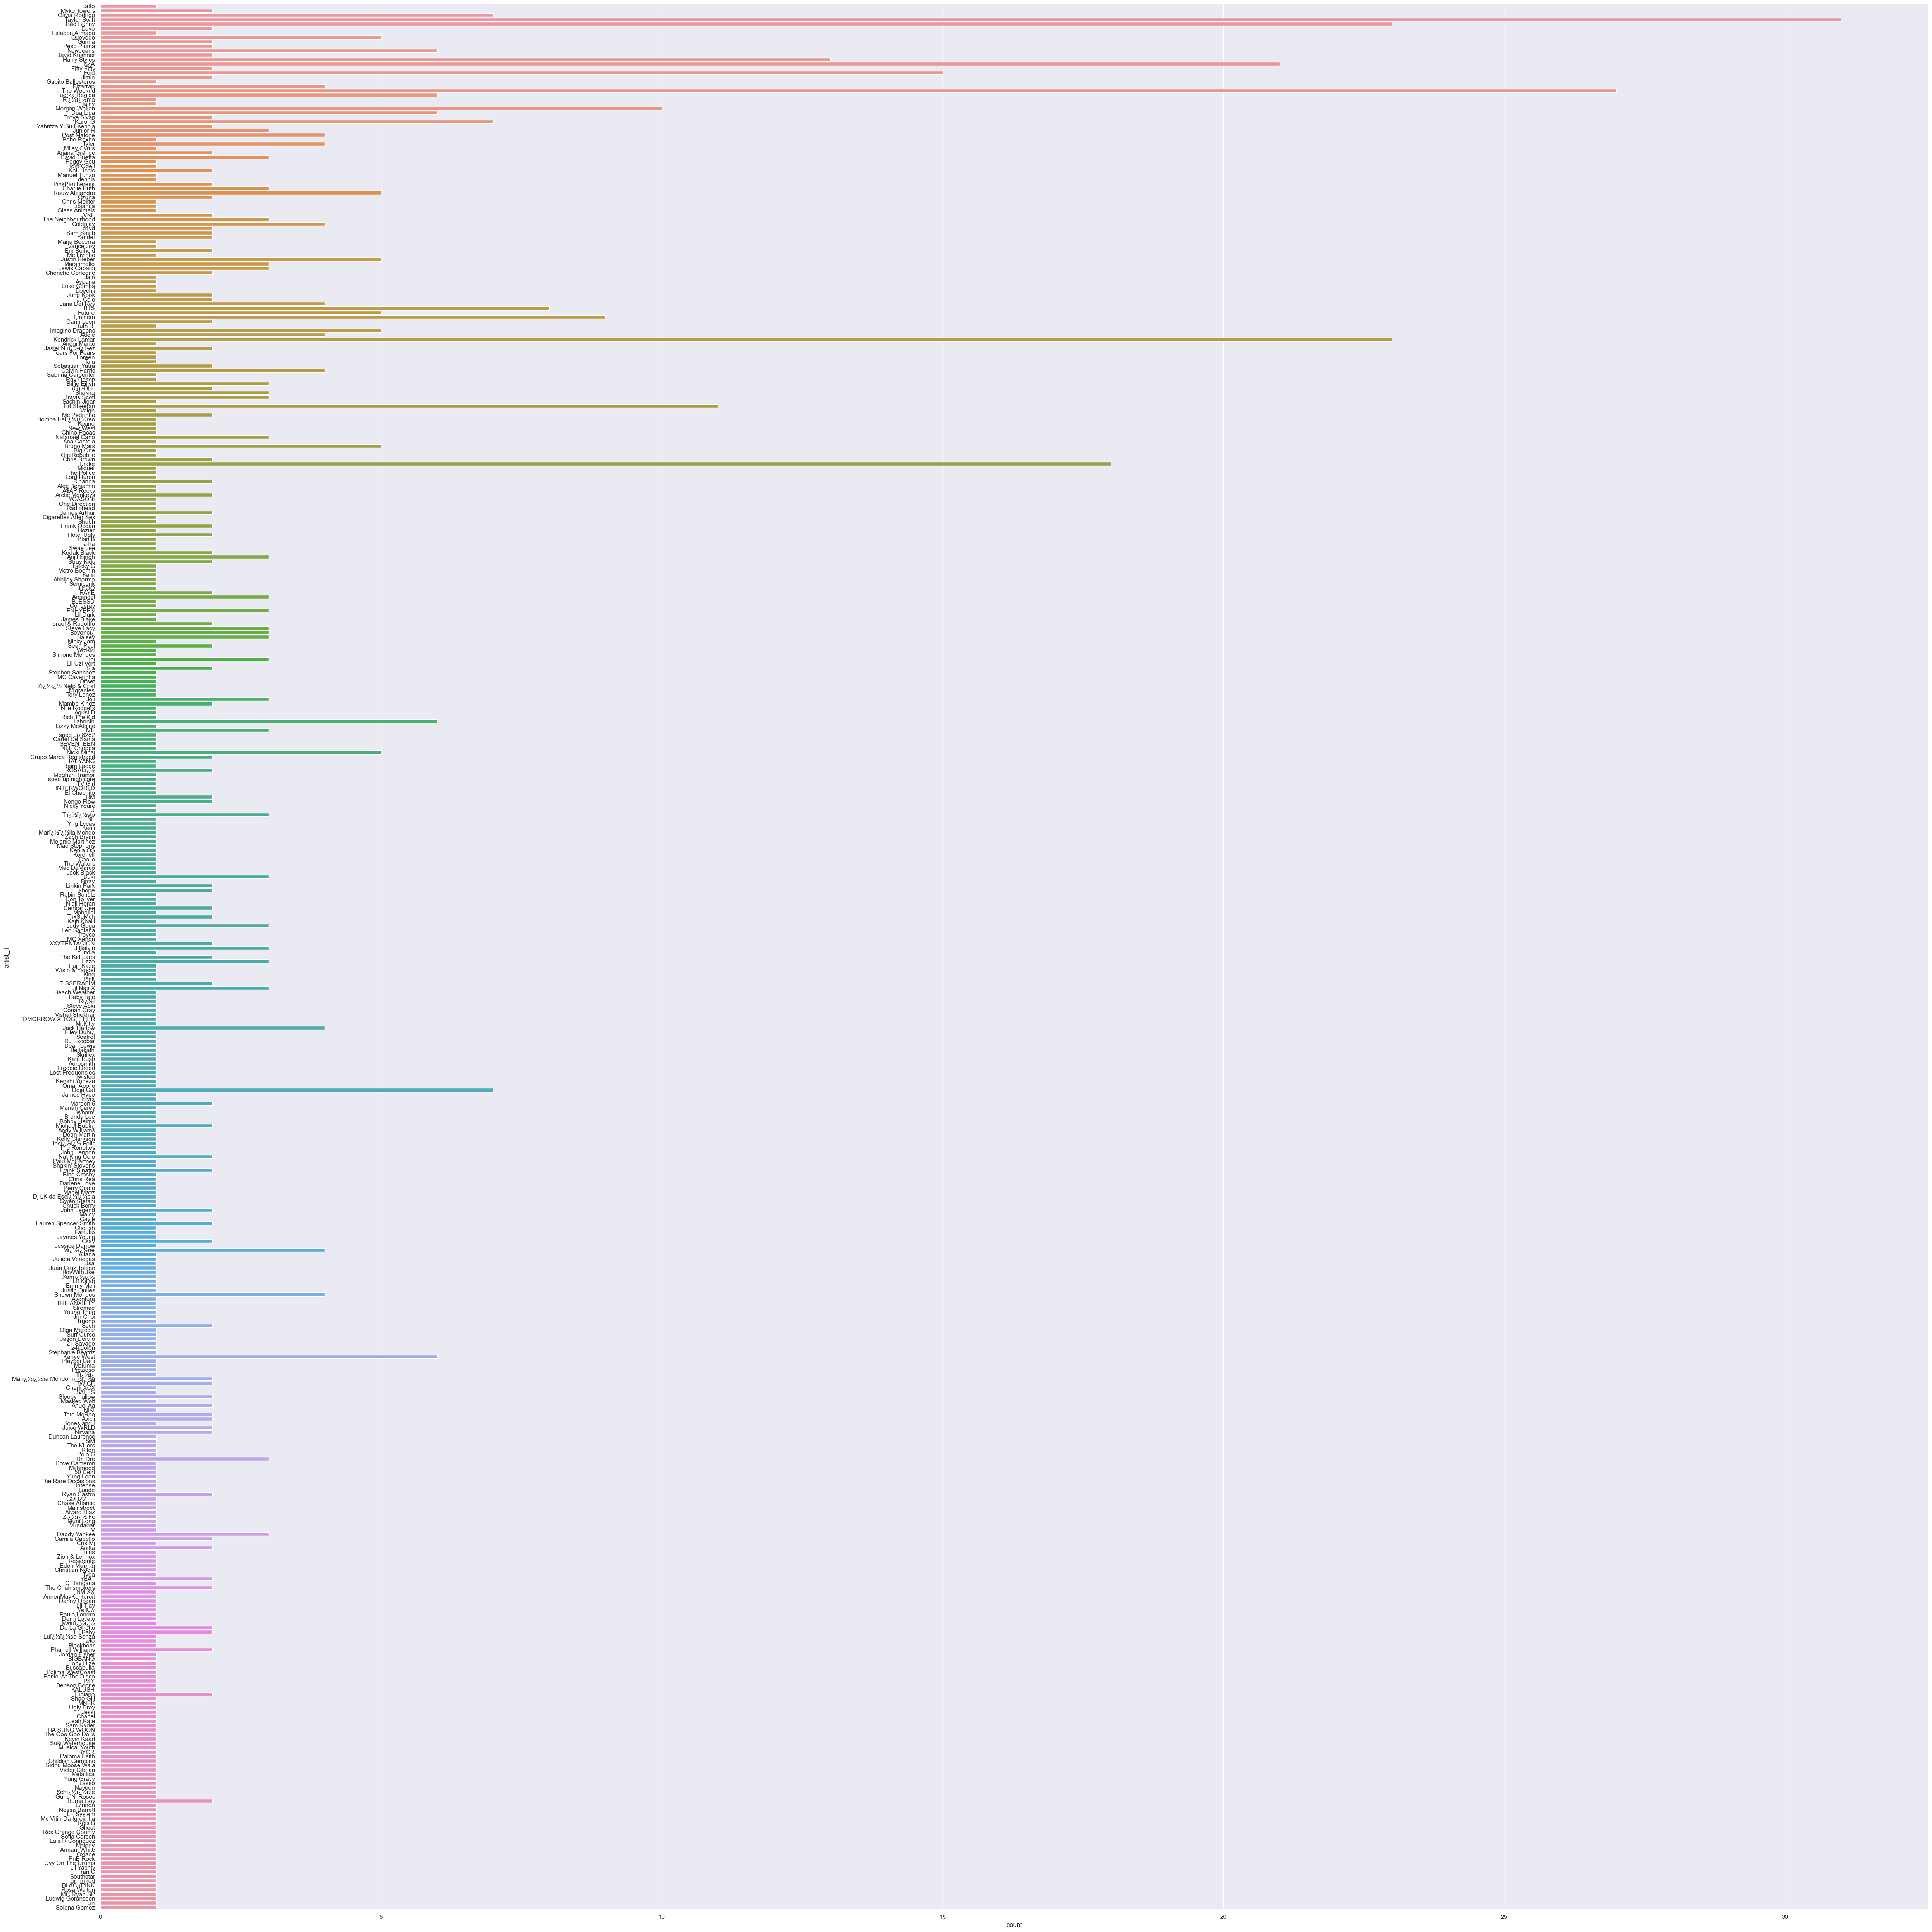

In [35]:
print("Number of times each artist appears:", len(categorical_df["artist_1"].unique()))

print(categorical_df["artist_1"].value_counts())
sb.catplot(y = "artist_1", data = df, kind = "count", height = 50)

<Axes: xlabel='mode', ylabel='count'>

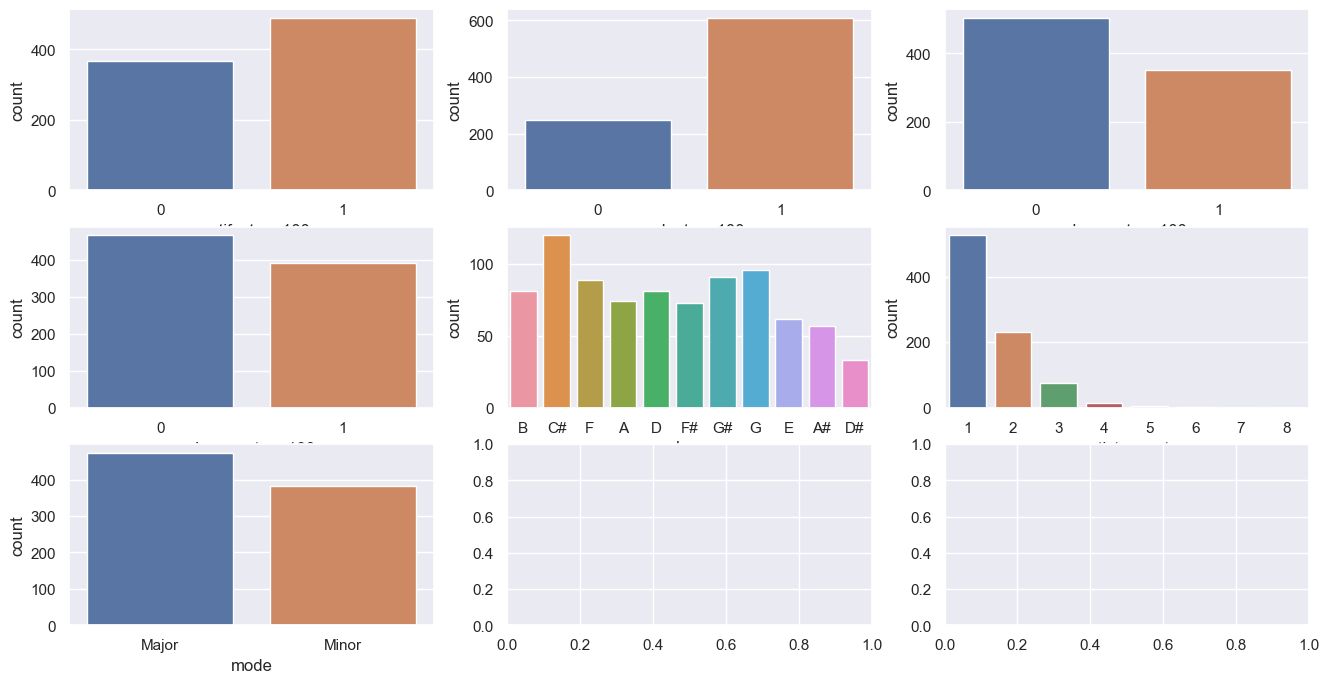

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(16,8))

sb.countplot(data=df, x='spotify_top_100', ax=axes[0,0])
sb.countplot(data=df, x='apple_top_100', ax=axes[0,1])
sb.countplot(data=df, x='deezer_top_100', ax=axes[0,2])
sb.countplot(data=df, x='shazam_top_100', ax=axes[1,0])
sb.countplot(data=df, x='key', ax=axes[1,1])
sb.countplot(data=df, x='artist_count', ax=axes[1,2])
sb.countplot(data=df, x='mode', ax=axes[2,0])

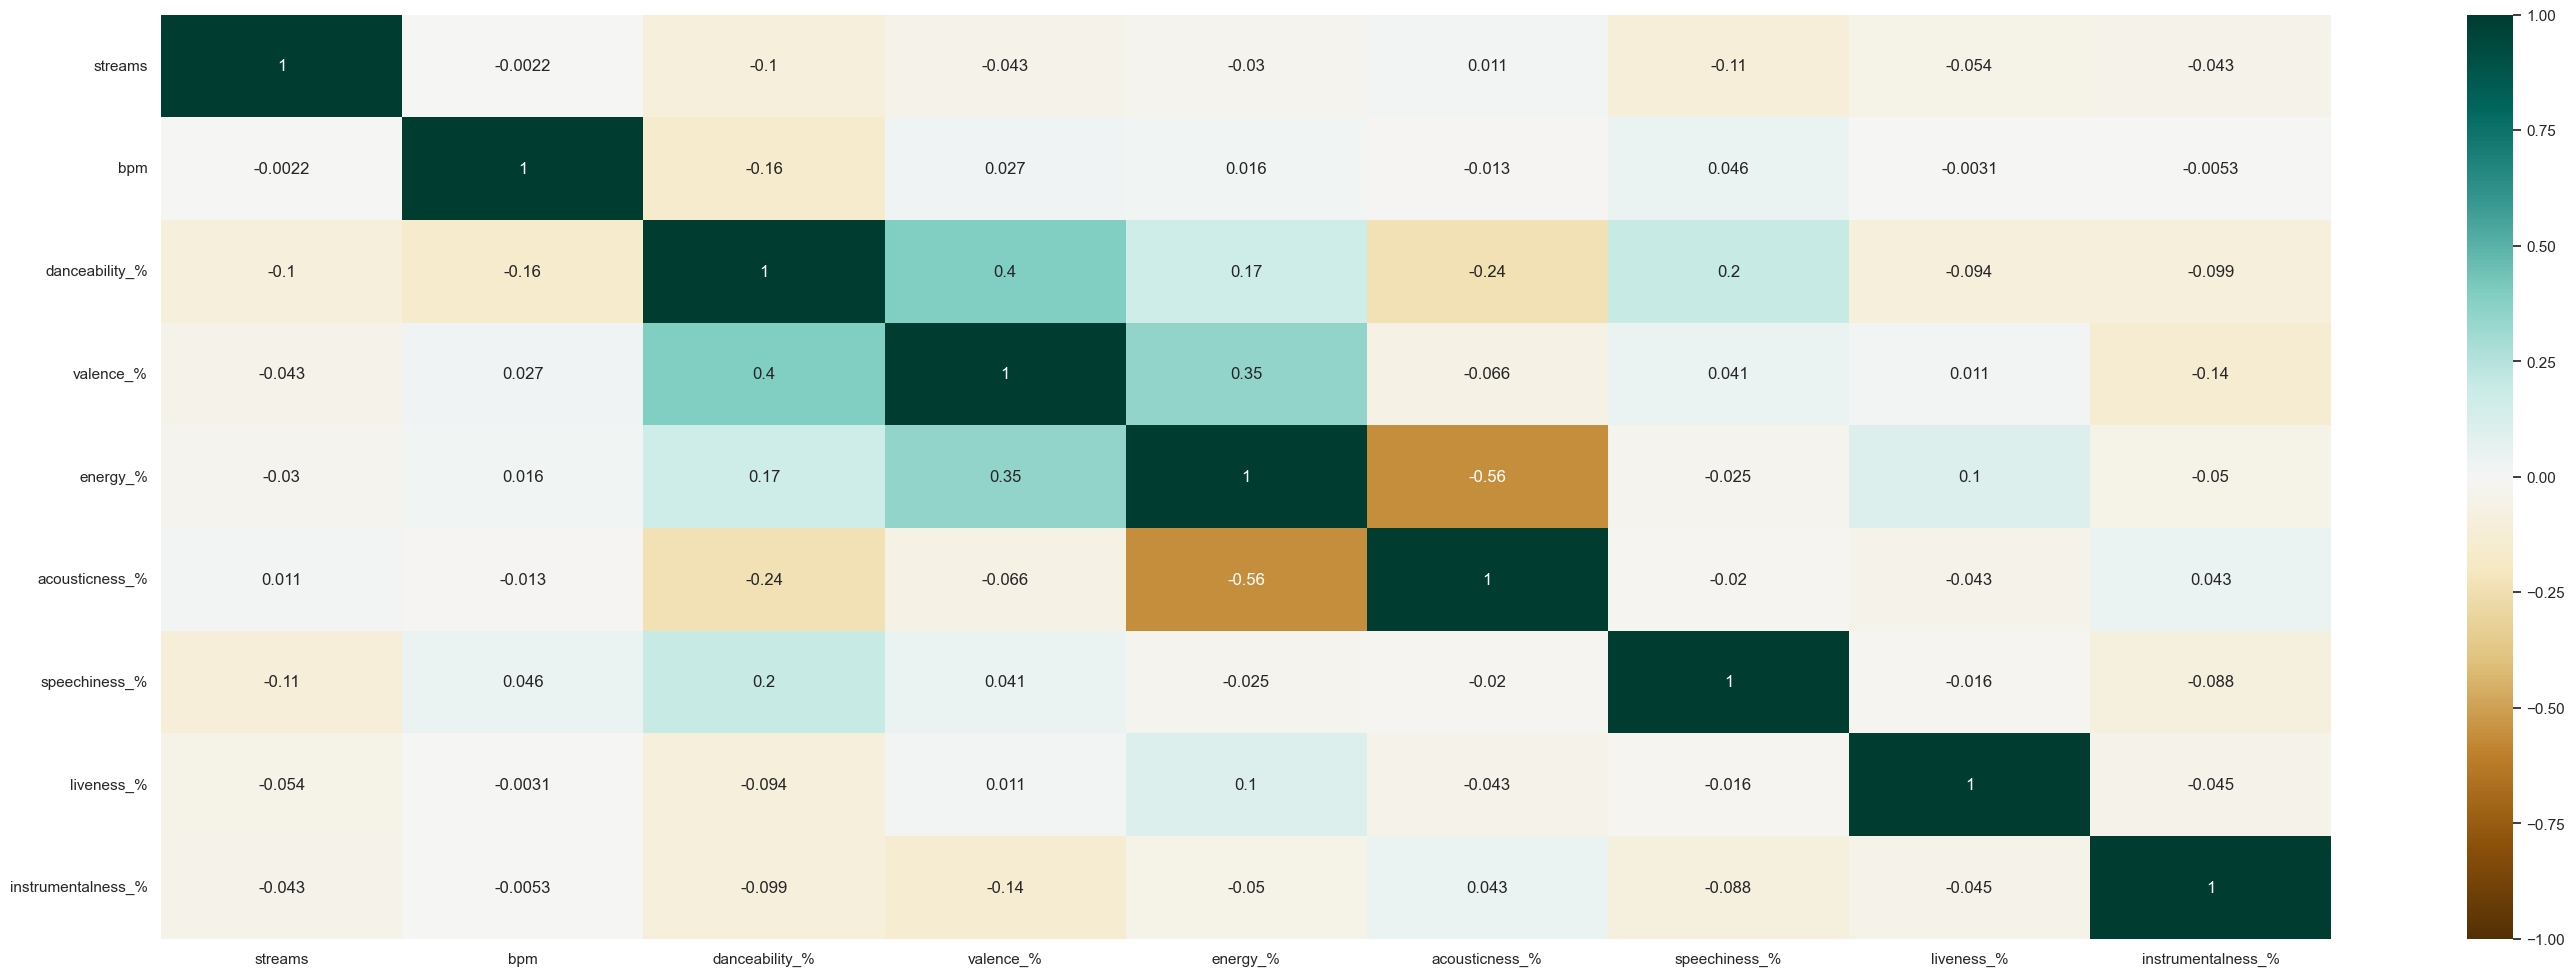

In [37]:
plt.figure(figsize=(35, 12))
heatmap = sb.heatmap(numerical_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

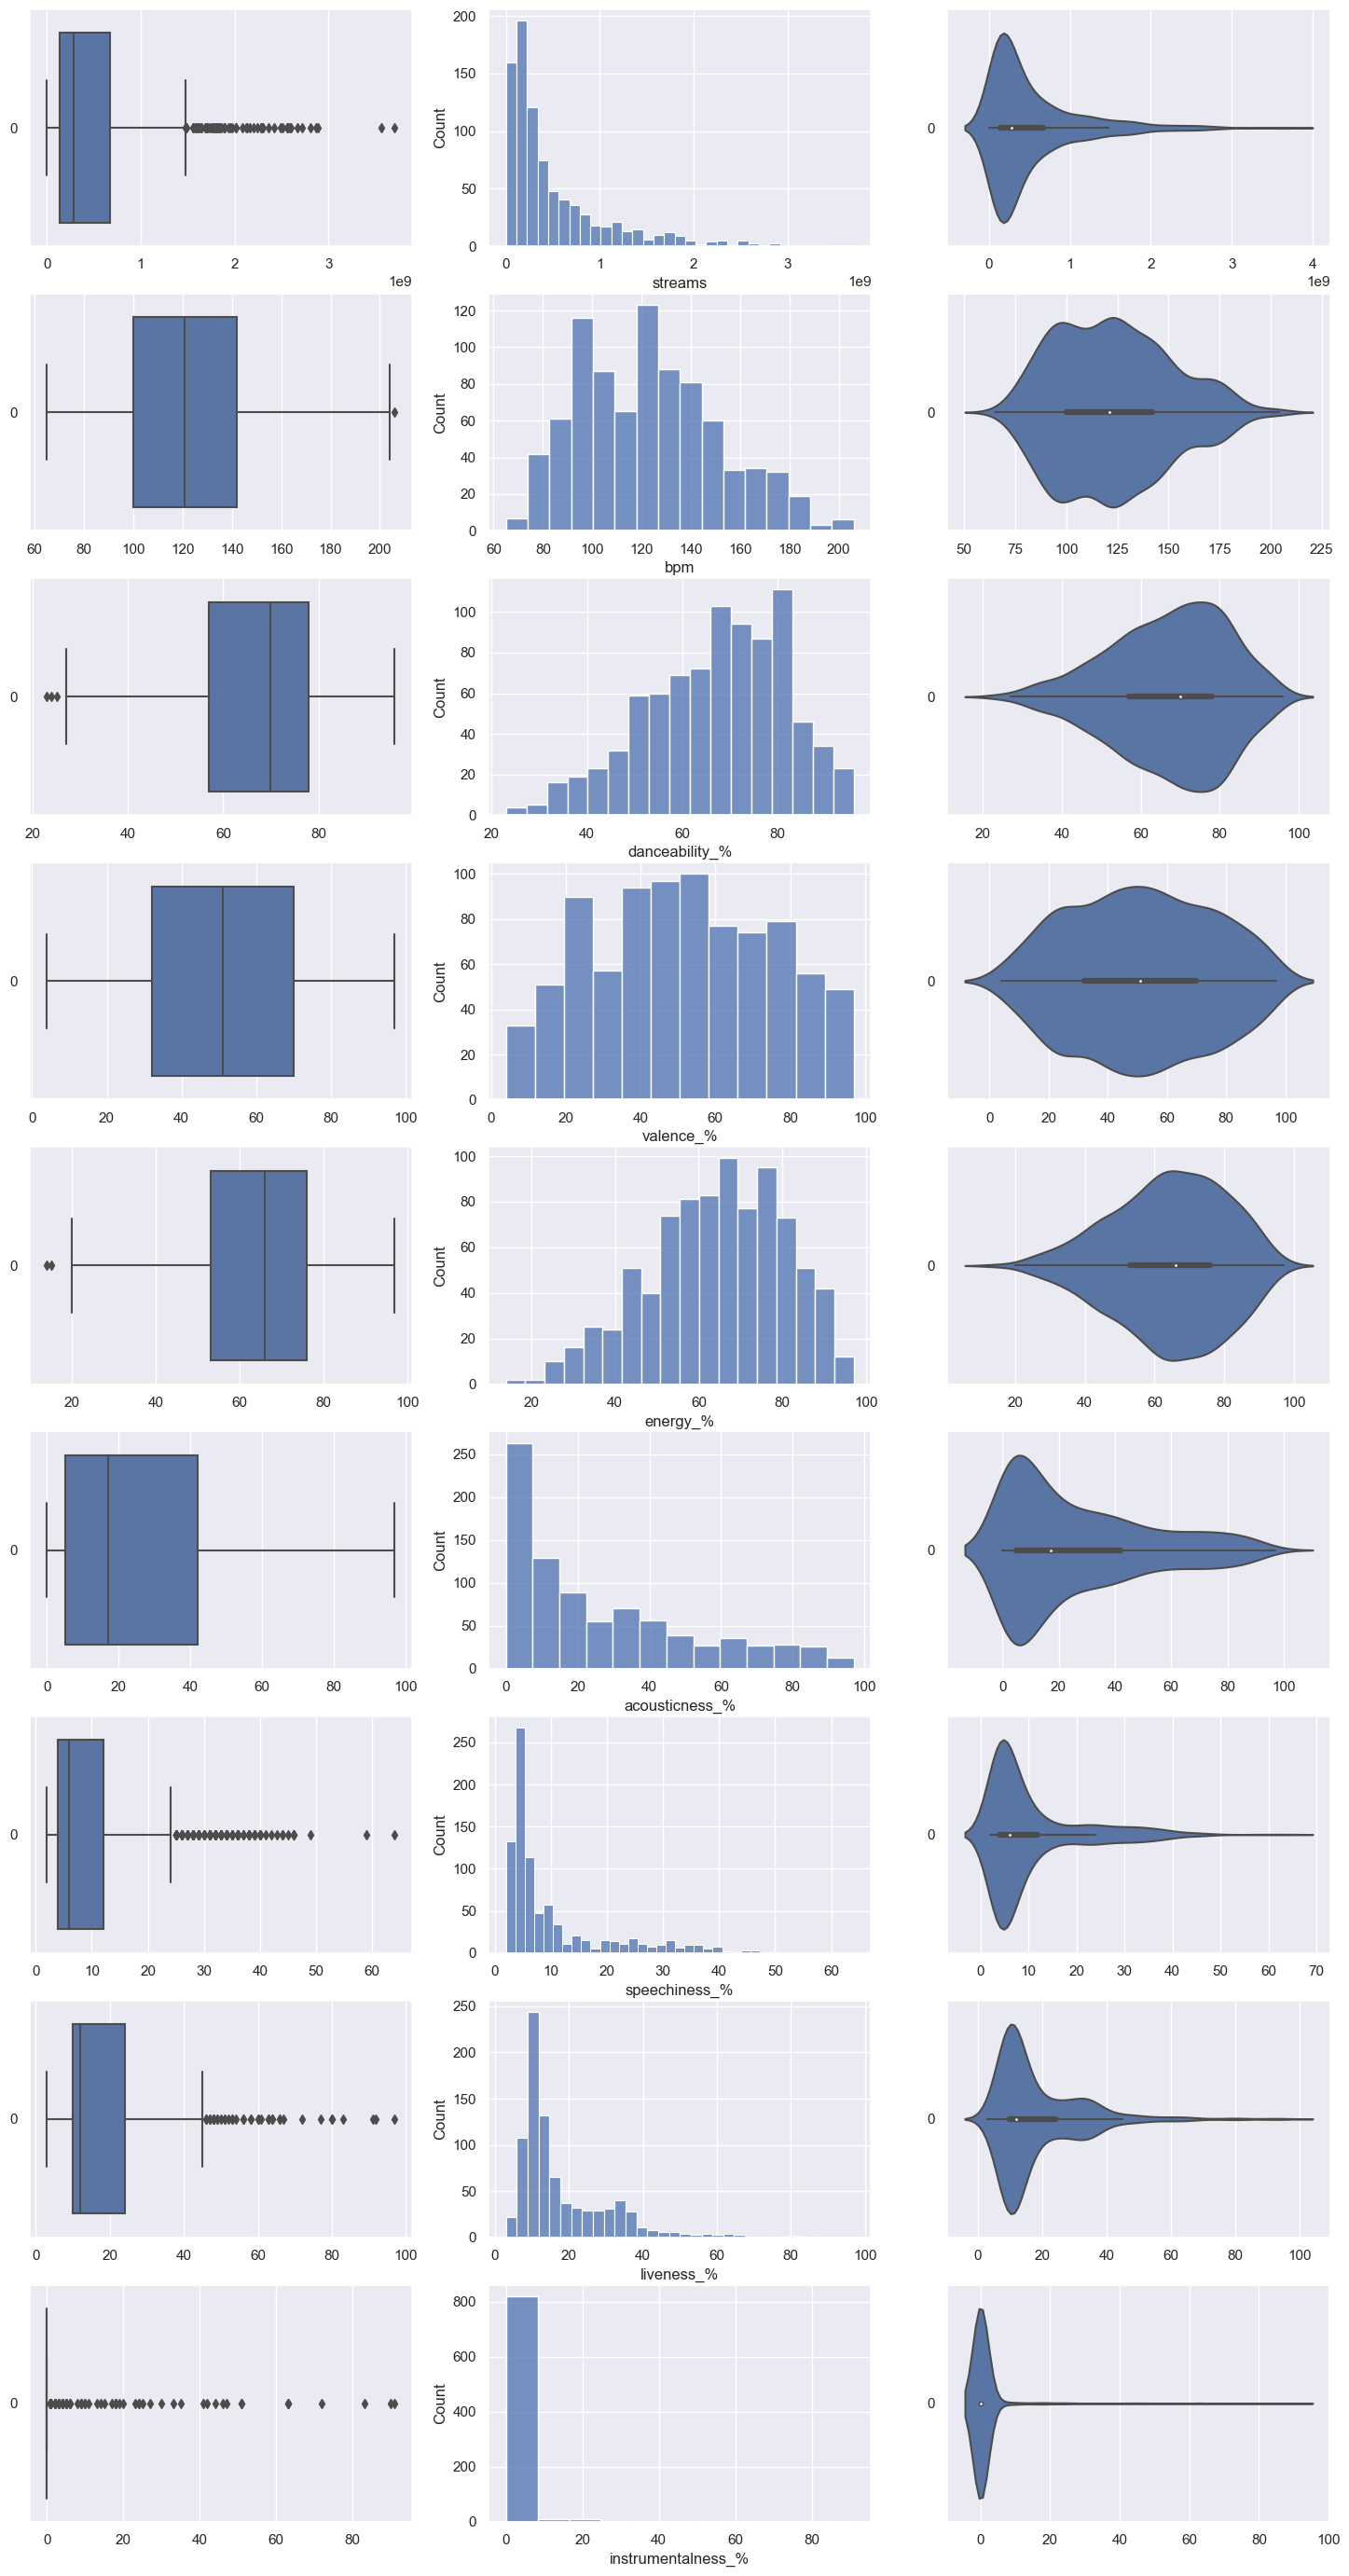

In [70]:
f, axes = plt.subplots(9, 3, figsize=(18, 35))

count = 0
for var in numerical_df:
    sb.boxplot(data = numerical_df[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numerical_df[var], ax = axes[count,1])
    sb.violinplot(data = numerical_df[var], orient = "h", ax = axes[count,2])
    count += 1

                     streams       bpm  danceability_%  valence_%  energy_%  \
streams             1.000000 -0.002163       -0.100702  -0.042787 -0.029714   
bpm                -0.002163  1.000000       -0.161907   0.027436  0.016068   
danceability_%     -0.100702 -0.161907        1.000000   0.397807  0.166331   
valence_%          -0.042787  0.027436        0.397807   1.000000  0.346820   
energy_%           -0.029714  0.016068        0.166331   0.346820  1.000000   
acousticness_%      0.010798 -0.012766       -0.240092  -0.066017 -0.561660   
speechiness_%      -0.112896  0.046373        0.196831   0.040850 -0.025340   
liveness_%         -0.054275 -0.003106       -0.093882   0.010830  0.103592   
instrumentalness_% -0.043068 -0.005266       -0.099225  -0.144168 -0.050323   

                    acousticness_%  speechiness_%  liveness_%  \
streams                   0.010798      -0.112896   -0.054275   
bpm                      -0.012766       0.046373   -0.003106   
danceability_%

<Axes: >

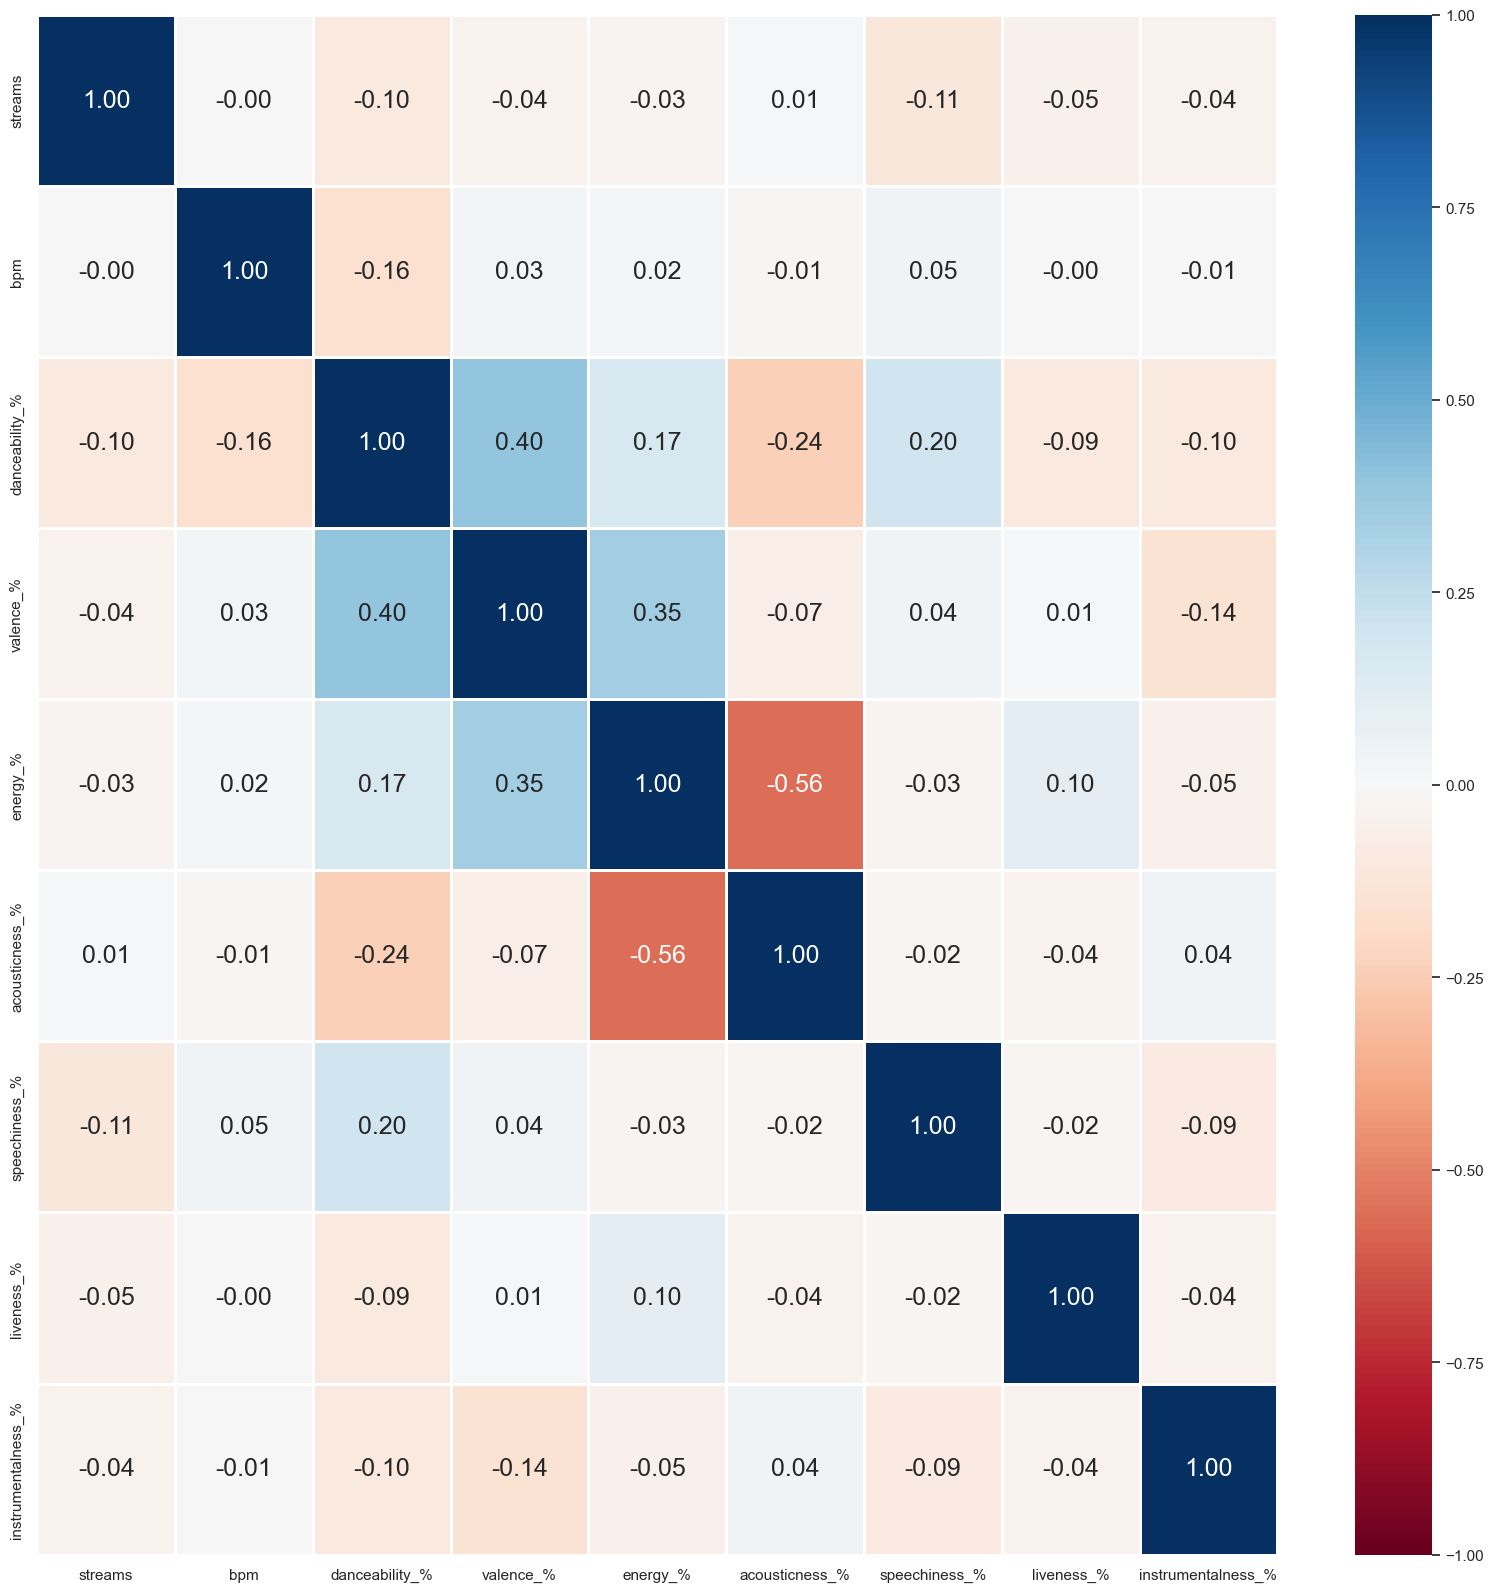

In [39]:
print(numerical_df.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numerical_df.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

# Preparing the dataset

In [40]:
spotify_df = combined_df.drop(['apple_top_100', 'shazam_top_100', 'deezer_top_100', 'streams'], axis=1)

In [41]:
from sklearn.model_selection import train_test_split

x = spotify_df.drop(['spotify_top_100'], axis=1)
y = pd.DataFrame(spotify_df['spotify_top_100'])


X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)

# Random forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/Users/nicolelow/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [44]:
y_pred = rf.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6395348837209303


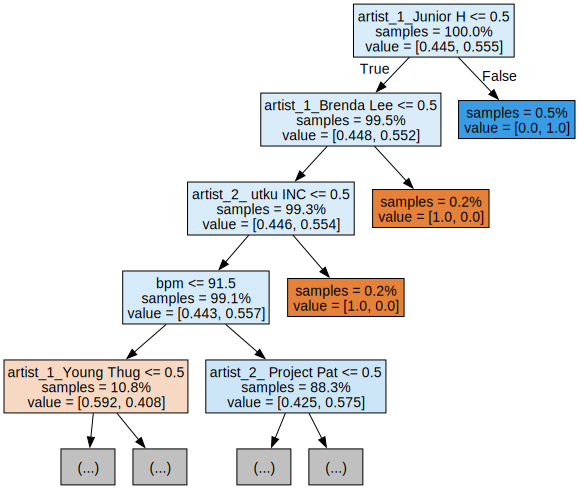

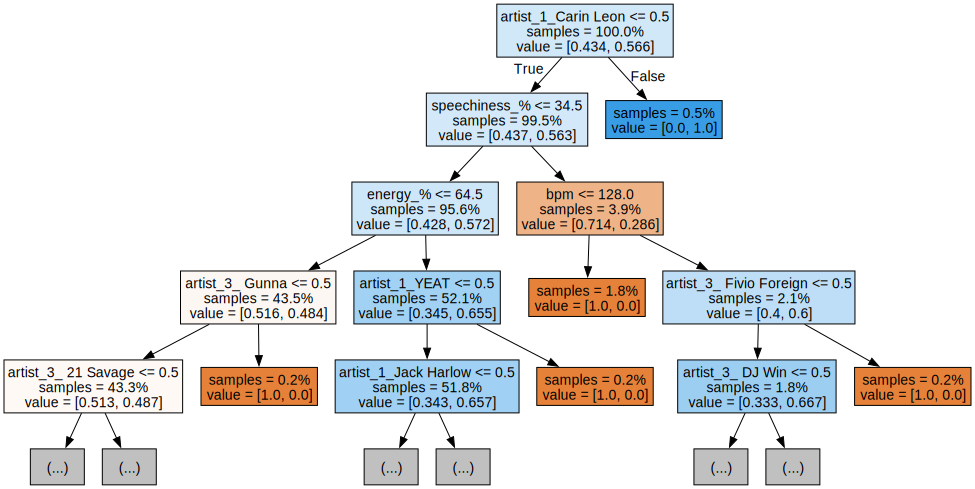

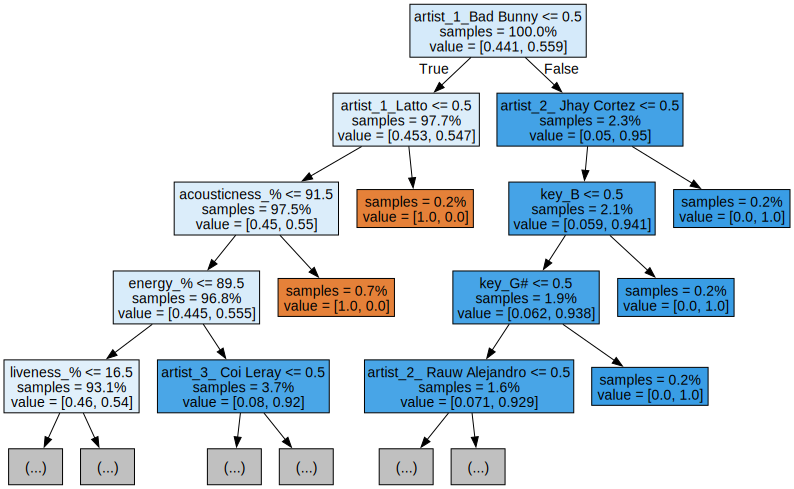

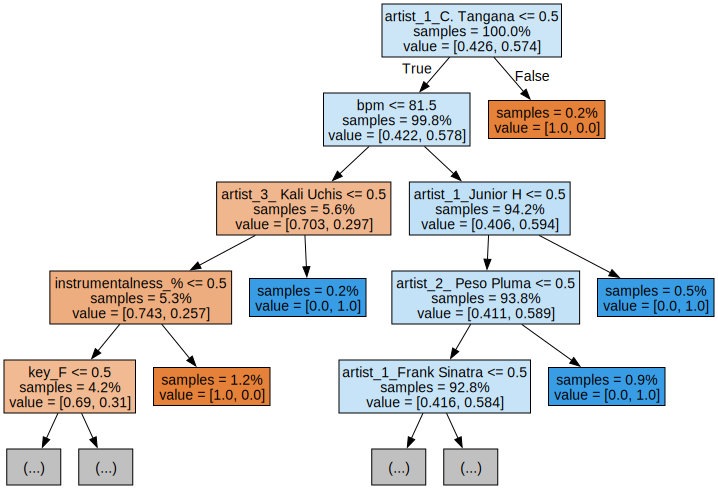

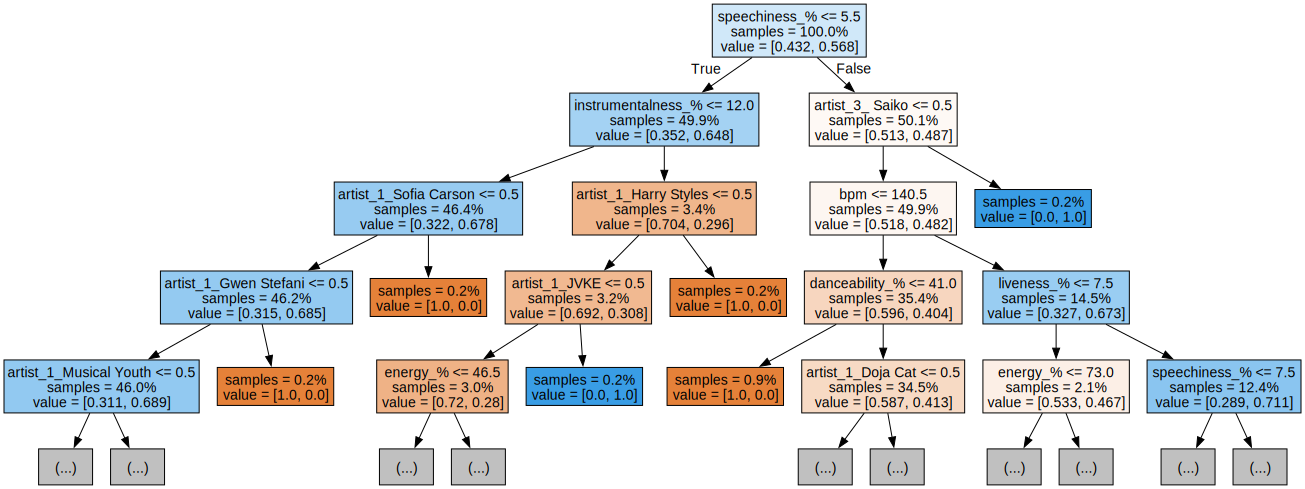

In [46]:
# Export the first three decision trees from the forest

for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=4, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

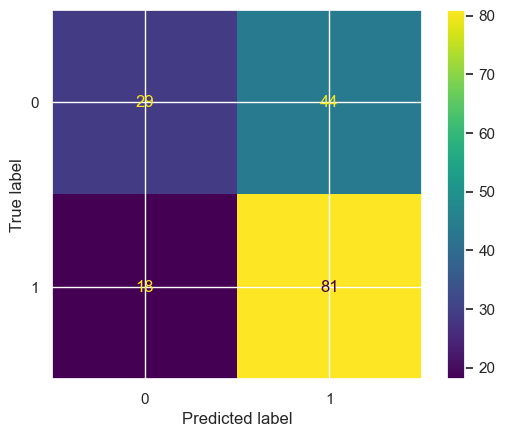

In [47]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [52]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6395348837209303
Precision: 0.648
Recall: 0.8181818181818182
F1 Score: 0.7232142857142857


# XG Boost

In [72]:
from xgboost import XGBClassifier
model = XGBClassifier(
    max_depth=3,           
    learning_rate=0.1,  
    n_estimators=100  
)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
predictions = model.predict(X_test)

In [74]:
accuracy_xg = accuracy_score(y_test, predictions)
precision_xg = precision_score(y_test, predictions)
recall_xg = recall_score(y_test, predictions)
f1_xg = f1_score(y_test, predictions)

print("Accuracy:", accuracy_xg)
print("Precision:", precision_xg)
print("Recall:", recall_xg)
print("F1 Score:", f1_xg)

Accuracy: 0.6337209302325582
Precision: 0.65
Recall: 0.7878787878787878
F1 Score: 0.7123287671232875
